# 3.1 MNIST

- MNIST : 70000개의 숫자 이미지 데이터셋. 분류 알고리즘 학습에 많이 사용됨

In [52]:
#download MNIST
import sklearn
import sklearn.datasets
from sklearn.datasets import fetch_openml # python3.0부터는 mldata가 아닌 openml을 사용

mnist=fetch_openml('mnist_784',version=1,cache=True)

In [53]:
X, y = mnist['data'], mnist['target'] 

In [72]:
y = y.astype(np.uint8)

In [73]:
# array 파악
X.shape

(70000, 784)

In [74]:
y.shape

(70000,)

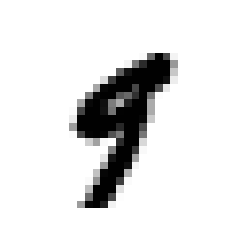

In [75]:
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)

plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation='nearest')
plt.axis('off')
plt.show()

In [76]:
y[36000]

9

In [77]:
X_train, X_test, y_train,y_test=X[:60000],X[60000:],y[:60000],y[60000:]

In [78]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train,y_train=X_train[shuffle_index],y_train[shuffle_index]

➔ 훈련 세트를 섞어서 모든 교차 검증 필드가 비슷해지게 함 (한 개의 fold에서도 특정 숫자가 누락되지 않게 해야 함)

# 3.2 이진 분류기 훈련

- 이진 분류기 ex) 5 분류기

In [79]:
# 타깃 벡터 생성
y_train_5=(y_train==5)
y_test_5=(y_test==5)

In [80]:
7from sklearn.linear_model import SGDClassifier
sgd_clf=SGDClassifier(max_iter=5, random_state=42)

sgd_clf.fit(X_train, y_train_5)

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


SGDClassifier(max_iter=5, random_state=42)

- [ SGDClassifier ] <br>
max_iter : The maximum number of passes over the training data.<br>
random_state : Used for shuffling the data, when shuffle is set to True. 

In [82]:
sgd_clf.predict([some_digit])

array([False])

# 3.3 성능 측정

## 3.3.1 교차 검증을 사용한 정확도 측정

* 교차 검증 구현

In [83]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds=StratifiedKFold(n_splits=3, random_state=42)

for train_index,test_index in skfolds.split(X_train, y_train_5):
    clone_clf=clone(sgd_clf) #모델 복사
    X_train_folds=X_train[train_index]
    y_train_folds=y_train_5[train_index]
    X_test_fold=X_train[test_index]
    y_test_fold=y_train_5[test_index]
    
    clone_clf.fit(X_train_folds,y_train_folds)
    y_pred=clone_clf.predict(X_test_fold)
    n_correct=sum(y_pred==y_test_fold)
    print(n_correct/len(y_pred))

* cross_val_score() 함수로 fold가 3개인 Kfold 교차검증으로 SGD 평가<br>
➔ 훈련 set을 3개로 나누고 각 fold에 대해 예측 후 평가 위해 나머지들로 훈련시킨 모델 사용

In [90]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf,X_train,y_train_5,cv=3, scoring='accuracy')

C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "
C:\Users\iryun\Anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:570: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn("Maximum number of iteration reached before "


array([0.95915, 0.9669 , 0.96445])

In [92]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self,X,y=None):
        pass
    def predict(self,X):
        return np.zeros((len(X),1),dtype=bool)

In [93]:
never_5_clf=Never5Classifier()
cross_val_score(never_5_clf,X_train,y_train_5,cv=3,scoring="accuracy")

array([0.90985, 0.91075, 0.90835])